In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

plt.rcParams["figure.figsize"] = (9, 9)

# Generate sample data
np.random.seed(42)

# Create three clusters of points
centroids = [[-2, -2], [-1, 2], [3, 3]]
npoints = [100, 100, 100]
SD = 0.8
clusters = [
    np.random.randn(npoints[i], 2) * SD + centroids[i] for i in range(len(centroids))
]
# Make a virtual size that is inversely proportional to the distance of the centroid
sizes = [
    100 / (1 + 5 * ((clus - cent) ** 2).sum(axis=1))
    for clus, cent in zip(clusters, centroids)
]
concat_sizes = np.concatenate(sizes)
real_labels = np.concatenate([[i] * npoints[i] for i in range(len(centroids))])

X = np.concatenate(clusters)

# Apply DBSCAN
dists = euclidean_distances(X, X)
db = DBSCAN(metric="precomputed").fit(dists)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2,
        2,  2,  2,  2,  2

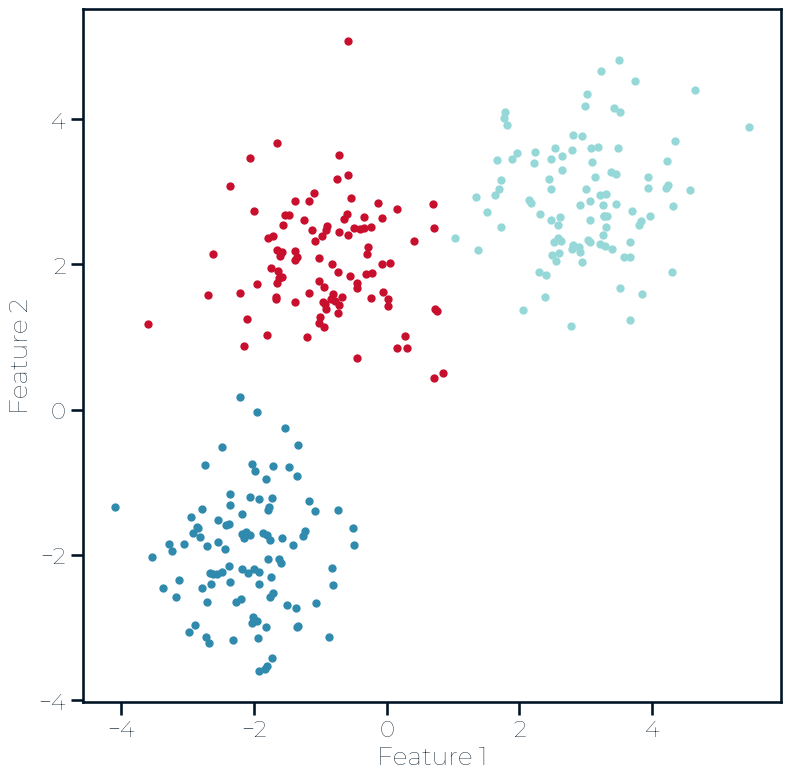

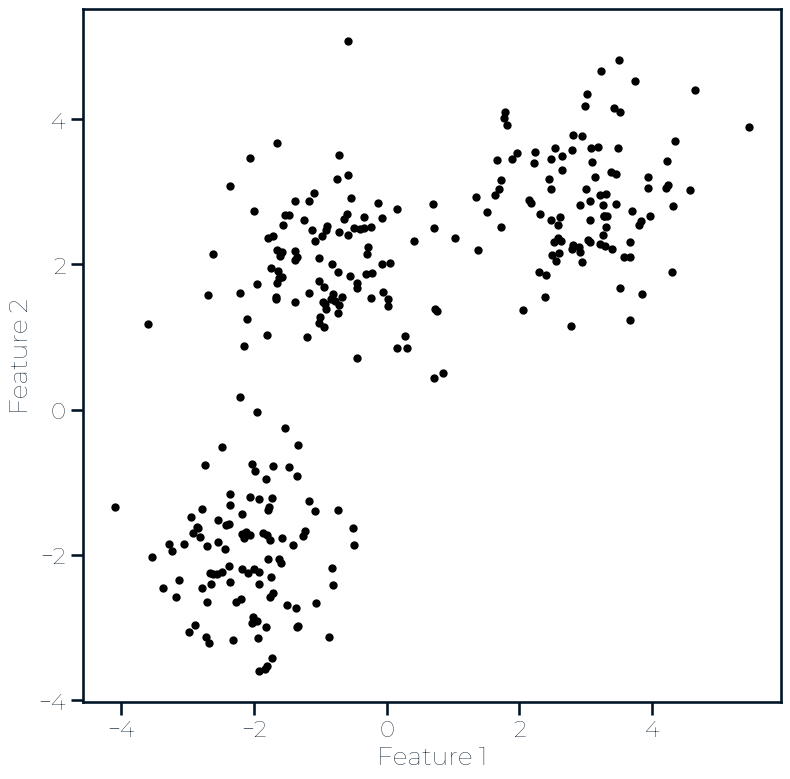

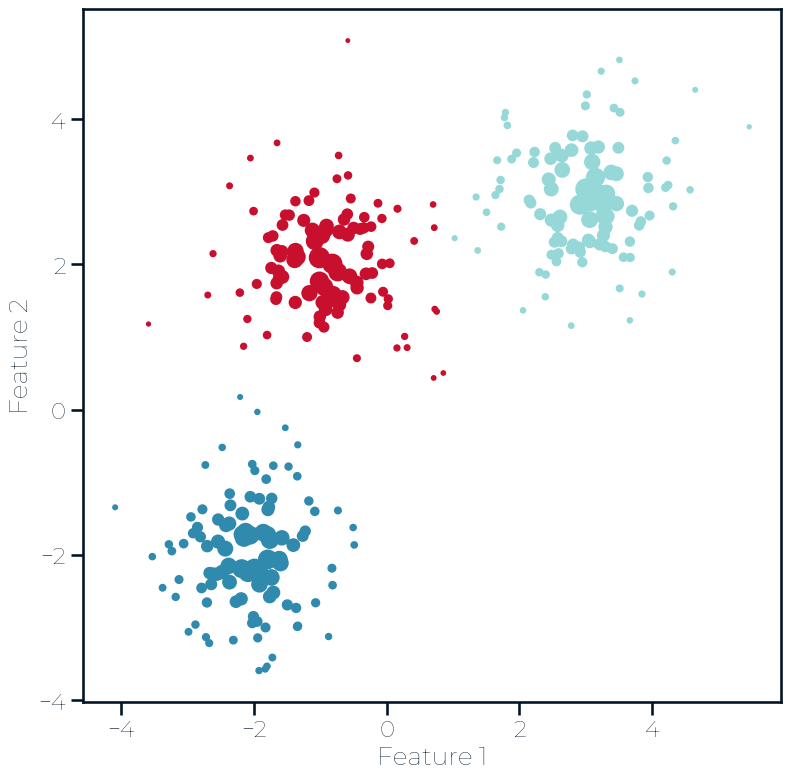

In [2]:
import vizta

vizta.mpl.set_theme(context="talk")


def plot_points(X, real_labels, size=10):
    # Plot all points
    for i in np.unique(real_labels):
        mask = real_labels == i
        plt.scatter(X[mask, 0], X[mask, 1], s=size, label=i)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


def plot_points_nocolor(X, size=10):
    plt.scatter(X[:, 0], X[:, 1], s=size, color="black")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


def plot_points_varsize(X, real_labels, sizes):
    for i in np.unique(real_labels):
        mask = real_labels == i
        plt.scatter(X[mask, 0], X[mask, 1], s=sizes[mask], label=i)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


plot_points(X, real_labels, size=20)
plt.show()

plot_points_nocolor(X, size=20)
plt.show()

plot_points_varsize(X, real_labels, 2 * concat_sizes)
plt.show()

[]

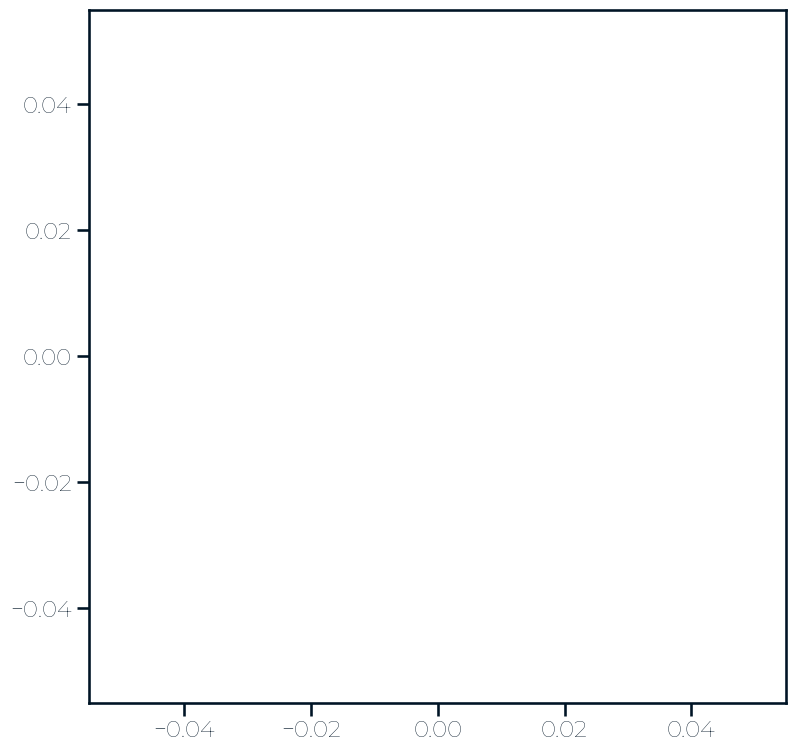

In [3]:
plt.plot()

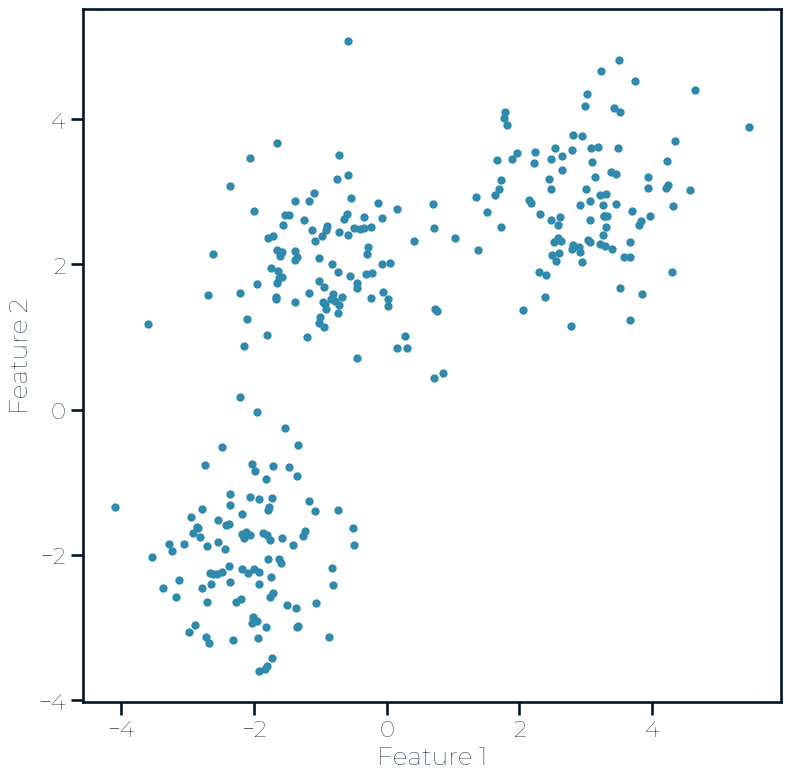

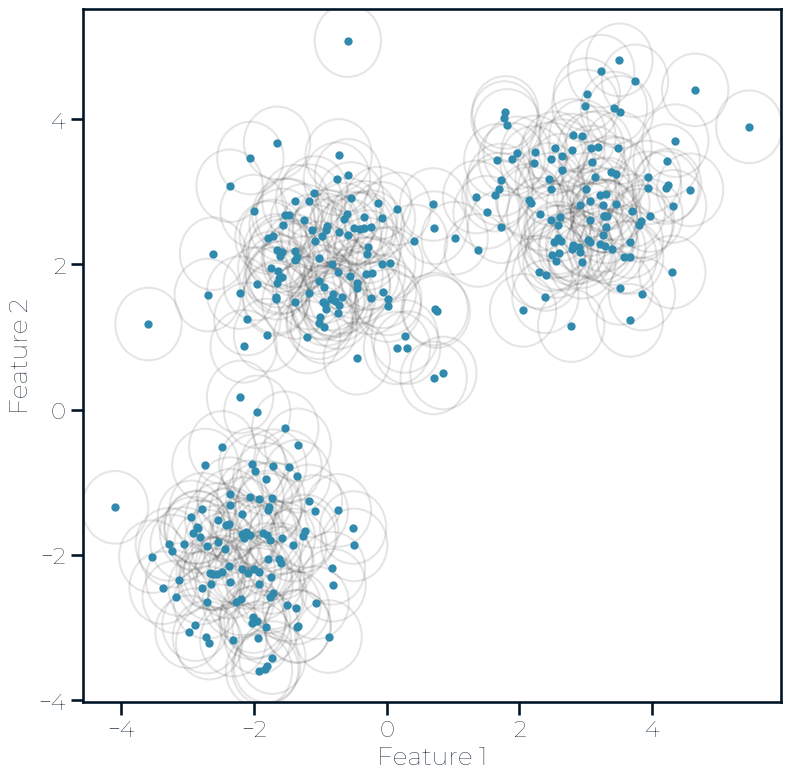

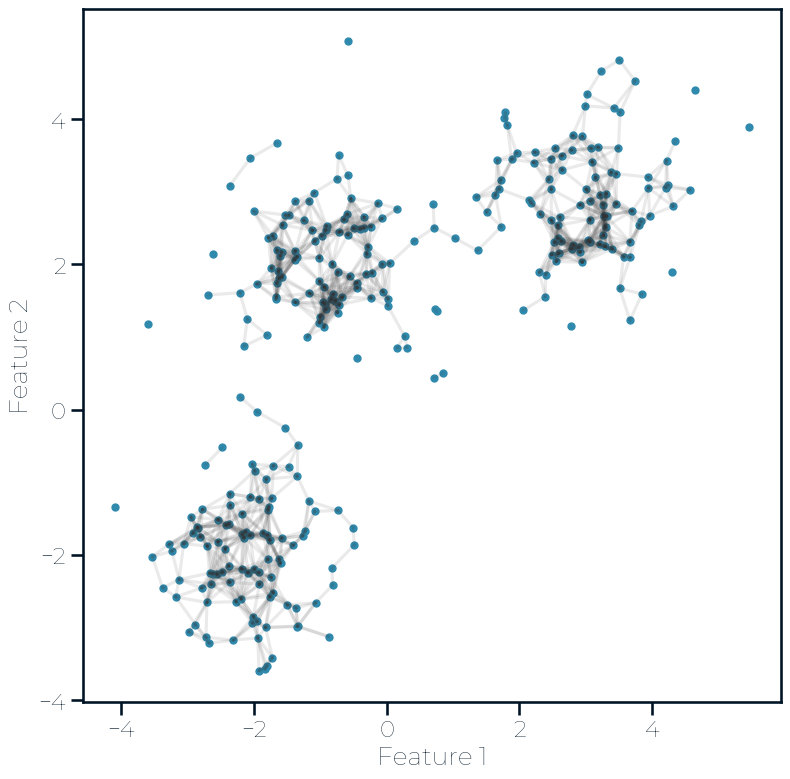

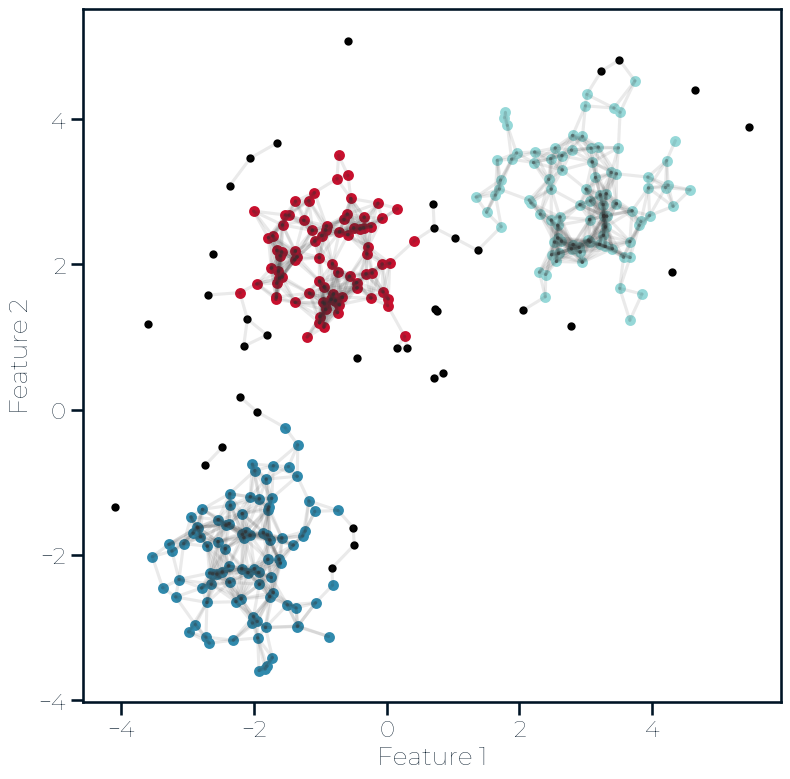

In [4]:
plot_points(X, np.ones_like(real_labels), size=20)
plt.show()

# Same plot but showing a circle around each point
for i in np.unique(real_labels):
    mask = real_labels == i
    for j in np.where(mask)[0]:
        plt.gca().add_artist(
            plt.Circle(X[j], 0.5, fill=False, color="black", alpha=0.1)
        )

plot_points(X, np.ones_like(real_labels), size=20)
plt.show()

# Same plot but with thin lines connecting each point to its neighbors


def plot_connections(X, dists):
    is_neighbor_mask = dists < 0.5
    for i in np.unique(real_labels):
        mask = real_labels == i
        for j in np.where(mask)[0]:
            for k in np.where(is_neighbor_mask[j])[0]:
                # Only plot the line once
                if k > j:
                    plt.plot(
                        [X[j, 0], X[k, 0]],
                        [X[j, 1], X[k, 1]],
                        color="#333333",
                        alpha=0.1,
                    )


plot_connections(X, dists)
plot_points(X, np.ones_like(real_labels), size=20)
plt.show()

# Same but with the cluster labels
plot_connections(X, dists)
non_noise = labels != -1
plot_points(X[non_noise, :], labels[non_noise], size=40)
plot_points_nocolor(X[~non_noise, :], size=20)
plt.show()